<a href="https://colab.research.google.com/github/AMMLRepos/salary-prediction-engineering-graduates/blob/main/Engineering_Graduates_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective 
To predict the salary of Engineering graduates based on the past public data provided by Aspiring Minds Research. 

# Dataset 
Dataset is publicly available on [Kaggle](https://www.kaggle.com/manishkc06/engineering-graduate-salary-prediction) and is provided by Aspiring Minds Research.

# Data Columns
- ID: A unique ID to identify a candidate
- Salary: Annual CTC offered to the candidate (in INR)
- Gender: Candidate's gender
- DOB: Date of birth of the candidate
- 10percentage: Overall marks obtained in grade 10 examinations
- 10board: The school board whose curriculum the candidate followed in grade 10
- 12graduation: Year of graduation - senior year high school
- 12percentage: Overall marks obtained in grade 12 examinations
- 12board: The school board whose curriculum the candidate followed
- CollegeID: Unique ID identifying the university/college which the candidate attended for her/his undergraduate
- CollegeTier: Each college has been annotated as 1 or 2. The annotations have been computed from the average AMCAT scores obtained by the students in the college/university. Colleges with an average score above a threshold are tagged as 1 and others as 2.
- Degree: Degree obtained/pursued by the candidate
- Specialization: Specialization pursued by the candidate
- CollegeGPA: Aggregate GPA at graduation
- CollegeCityID: A unique ID to identify the city in which the college is located in.
- CollegeCityTier: The tier of the city in which the college is located in. This is annotated based on the population of the cities.
- CollegeState: Name of the state in which the college is located
- GraduationYear: Year of graduation (Bachelor's degree)
- English: Scores in AMCAT English section
- Logical: Score in AMCAT Logical ability section
- Quant: Score in AMCAT's Quantitative ability section
- Domain: Scores in AMCAT's domain module
- ComputerProgramming: Score in AMCAT's Computer programming section
- ElectronicsAndSemicon: Score in AMCAT's Electronics & Semiconductor Engineering section
- ComputerScience: Score in AMCAT's Computer Science section
- MechanicalEngg: Score in AMCAT's Mechanical Engineering section
- ElectricalEngg: Score in AMCAT's Electrical Engineering section
- TelecomEngg: Score in AMCAT's Telecommunication Engineering section
- CivilEngg: Score in AMCAT's Civil Engineering section
- conscientiousness: Scores in one of the sections of AMCAT's personality test
- agreeableness: Scores in one of the sections of AMCAT's personality test
- extraversion: Scores in one of the sections of AMCAT's personality test
- nueroticism: Scores in one of the sections of AMCAT's personality test
- openesstoexperience: Scores in one of the sections of AMCAT's personality test

# Activities to perform 
- Install and Import required libraries 
- Download dataset 
- Load data to Python pandas 
- Perform Exploratory Data Analysis 
- Perform Data Preparation 
- Perform Data seperation into train, test and validation sets
- Train Model 
- Evaluate Model
- Improve Model

## Install and import required libraries
Install [opendatasets](https://github.com/JovianML/opendatasets) library which is an opensource library developed by [Team Jovian](https://jovian.ai) for downloading Kaggle datasets.
We need not to install other libraries as they are already provided as a part of Google Colab runtime.

In [3]:
!pip install opendatasets --quiet

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import opendatasets as od
import os

Set us basic styling guidelines for Google colab

In [28]:
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
pd.set_option('display.width', 1000)
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


## Download the dataset 

In [29]:
dataset_url = "https://www.kaggle.com/manishkc06/engineering-graduate-salary-prediction"
od.download(dataset_url)

Skipping, found downloaded files in "./engineering-graduate-salary-prediction" (use force=True to force download)


In [30]:
data_dir = "./engineering-graduate-salary-prediction"
datafile = os.listdir(data_dir)[0]

filepath = data_dir + "/" + datafile
print(filepath)

./engineering-graduate-salary-prediction/Engineering_graduate_salary.csv


## Load data into Python pandas

In [31]:
engineering_df = pd.read_csv(filepath)
print(engineering_df)

          ID Gender         DOB  10percentage                       10board  12graduation  12percentage                    12board  CollegeID  CollegeTier       Degree                             Specialization  collegeGPA  CollegeCityID  CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  agreeableness  extraversion  nueroticism  openess_to_experience  Salary
0     604399      f  1990-10-22         87.80                          cbse          2009         84.00                       cbse       6920            1  B.Tech/B.E.    instrumentation and control engineering       73.82           6920                1           Delhi            2013      650      665    810  0.694479                  485                    366               -1              -1              -1           -1         -1            -0.1590         0.3

## Perform Exploratory Data Analysis
As a part of EDA, let us get following - 
- Basic meta information on the dataset 
- Plot visualizations to understand how features are correlated 
- Get the correlation matrix 
- Plot the heatmap of correlation matrix 

In [32]:
engineering_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

- We have 34 columns with 2998 rows and datatypes of int, fload, and string(object) types
- We have 796 KB of data 



Let us get the basic statistics of the numerical columns we have in our dataset using describe()

In [33]:
engineering_df.describe()

,ID,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2.998000e+03,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,6.648926e+05,77.666264,2008.080720,74.341061,5210.210807,1.924616,71.509857,5210.210807,0.296197,2011.939960,501.066378,500.431621,514.137759,0.508458,351.868579,96.228152,94.147098,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05
std,3.648951e+05,10.002785,1.631814,11.120299,4776.609877,0.264053,8.122462,4776.609877,0.456655,36.780582,105.304512,87.299850,122.194955,0.463373,204.526227,158.737747,177.784536,99.785138,86.054739,103.552963,32.241501,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05
min,1.124400e+04,43.000000,1998.000000,40.000000,2.000000,1.000000,6.630000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,3.334648e+05,71.140000,2007.000000,66.000000,526.250000,2.000000,66.530000,526.250000,0.000000,2012.000000,425.000000,441.250000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,6.396945e+05,78.965000,2008.000000,74.000000,4027.500000,2.000000,71.800000,4027.500000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,9.951770e+05,85.600000,2009.000000,82.600000,8822.250000,2.000000,76.300000,8822.250000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.835612,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,1.297877e+06,97.760000,2012.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,804.000000,612.000000,715.000000,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


As shown in the output above, we have - 
- Max values for each numerical column
- Min value for each numerical column 
- Range of min and max 
- Average/mean 
- Standard deviation 


Let us now draw some visualizations to understand the patterns in the data 

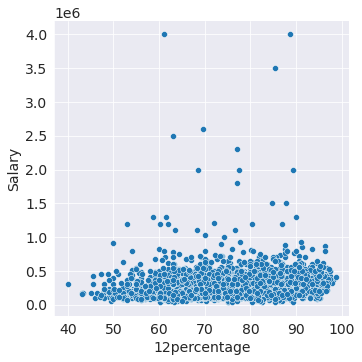

In [38]:
sns.relplot(x = "12percentage", y = "Salary", data = engineering_df);

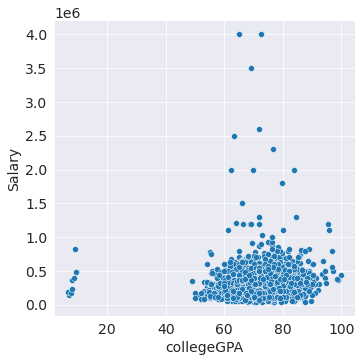

In [41]:
sns.relplot(x = "collegeGPA", y = "Salary", data = engineering_df);

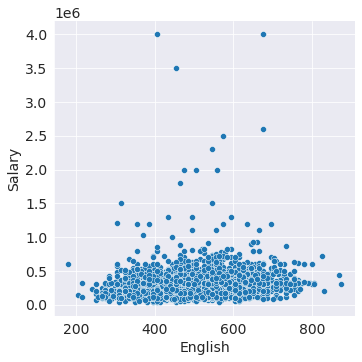

In [42]:
sns.relplot(x = "English", y = "Salary", data = engineering_df);

In [ ]:
sns.pairplot(engineering_df);